LOAD DATASET

In [2]:
import pandas as pd

df = pd.read_csv("../../data/processed/balanced_df.csv")

print(df.shape)
print(df.head())
print(df['label'].value_counts())

(170230, 2)
                                                text label
0                                                NaN  FAKE
1  us house may consider bill to fund government ...  REAL
2                                                NaN  FAKE
3                                                NaN  REAL
4  trump completely screws the middle east peace ...  FAKE
label
FAKE    85115
REAL    85115
Name: count, dtype: int64


In [3]:
df.isnull().sum()

text     133552
label         0
dtype: int64

Test Train Split

In [4]:
from sklearn.model_selection import train_test_split

X = df['text'].astype(str)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training Size: {X_train.shape[0]}")
print(f"Test Size: {X_test.shape[0]}")

Training Size: 136184
Test Size: 34046


Vectorization

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=25000,
    max_df=0.8,
    min_df=5,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF matrix shape (train)",X_train_tfidf.shape)
print("TF-IDF matrix shape (test)",X_test_tfidf.shape)


TF-IDF matrix shape (train) (136184, 25000)
TF-IDF matrix shape (test) (34046, 25000)


LOGISTIC REGRESSION MODEL

In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000,class_weight='balanced')
clf.fit(X_train_tfidf,y_train)

y_pred = clf.predict(X_test_tfidf)

EVALUATE PERFOMANCE

              precision    recall  f1-score   support

        FAKE     0.9886    0.2803    0.4367     17023
        REAL     0.5807    0.9968    0.7339     17023

    accuracy                         0.6385     34046
   macro avg     0.7847    0.6385    0.5853     34046
weighted avg     0.7847    0.6385    0.5853     34046



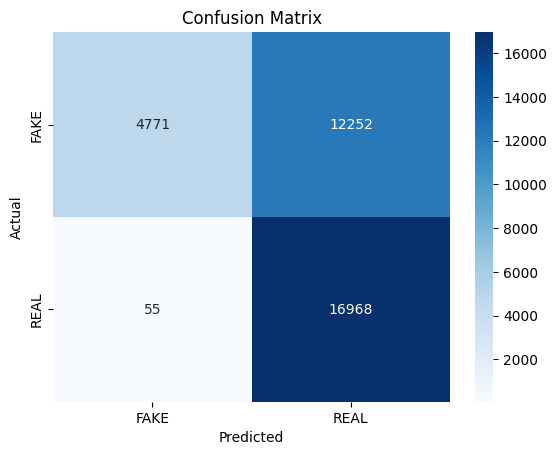

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print(classification_report(y_test,y_pred, digits=4))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=clf.classes_,yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()